In [69]:
!pip install pandas numpy scikit-learn matplotlib seaborn

  Using cached pandas-2.1.4.tar.gz (4.3 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> [278 lines of output]
      Ignoring numpy: markers 'python_version >= "3.12"' don't match your environment
        Using cached meson_python-0.13.1-py3-none-any.whl (79 kB)
        Using cached meson-1.2.1-py3-none-any.whl.metadata (1.7 kB)
        Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
        Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
        Using cached oldest_supported_numpy-2023.12.21-py3-none-any.whl.metadata (9.8 kB)
        Using cached versioneer-0.29-py3-none-any.whl.metadata (16 kB)
        Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
        Using cached pyproject_metadata-0.7.1-py3-none-any.whl (7.4 kB)
        Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
        Using cached numpy-1.19.3.zip (7.3 MB)
        Installing build dependencies: started
        Installing build 

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split


In [71]:
data = pd.read_csv('train.csv')
print(data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [72]:
newdata=data[['LotArea', 'FullBath', 'HalfBath', 'BedroomAbvGr','SalePrice']]
print(newdata.head())

   LotArea  FullBath  HalfBath  BedroomAbvGr  SalePrice
0     8450         2         1             3     208500
1     9600         2         0             3     181500
2    11250         2         1             3     223500
3     9550         1         0             3     140000
4    14260         2         1             4     250000


In [73]:
newdata.drop_duplicates()

,LotArea,FullBath,HalfBath,BedroomAbvGr,SalePrice
0,8450,2,1,3,208500
1,9600,2,0,3,181500
2,11250,2,1,3,223500
3,9550,1,0,3,140000
4,14260,2,1,4,250000
...,...,...,...,...,...
1455,7917,2,1,3,175000
1456,13175,2,0,3,210000
1457,9042,2,0,4,266500
1458,9717,1,0,2,142125


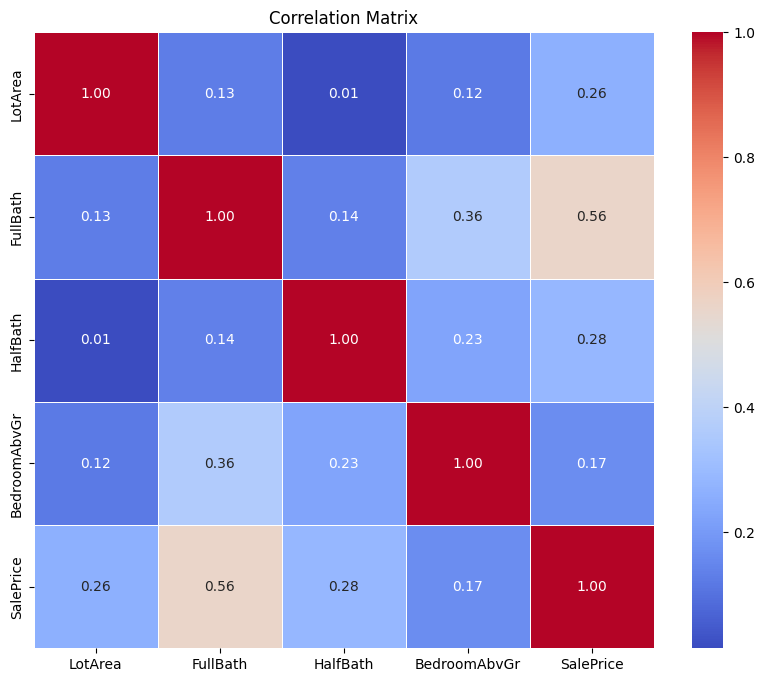

In [74]:
correlation_matrix = newdata.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

Text(0.5, 0, 'LotArea')

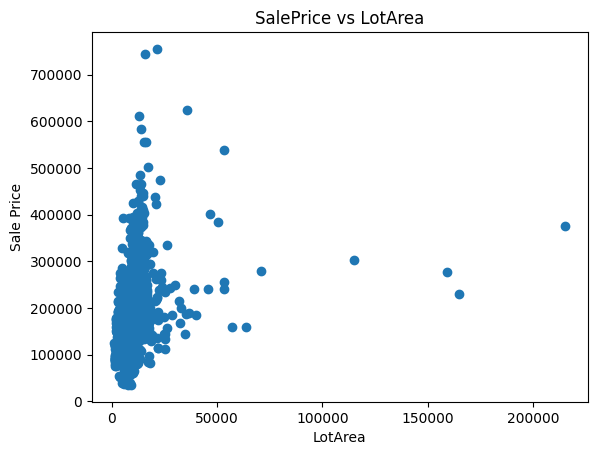

In [82]:
plt.scatter(x=newdata.LotArea, y=newdata.SalePrice)
plt.title('SalePrice vs LotArea')
plt.ylabel('Sale Price')
plt.xlabel('LotArea')

     

In [83]:


# Calculate the Z-scores for each numerical column
z_scores = stats.zscore(newdata)

# Define a threshold for Z-score (adjust as needed)
threshold = 3

# Filter out rows with Z-scores beyond the threshold
outliers = (abs(z_scores) > threshold).any(axis=1)
cleaned_data = data[~outliers]

# Display the size before and after removing outliers
print(f"Original data size: {data.shape}")
print(f"Data size after removing outliers: {cleaned_data.shape}")


Original data size: (1460, 81)
Data size after removing outliers: (1403, 81)


In [84]:
print(cleaned_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [85]:
features = cleaned_data[['LotArea', 'BedroomAbvGr', 'FullBath','HalfBath']]
target = cleaned_data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [86]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [80]:
predictions = model.predict(X_test)


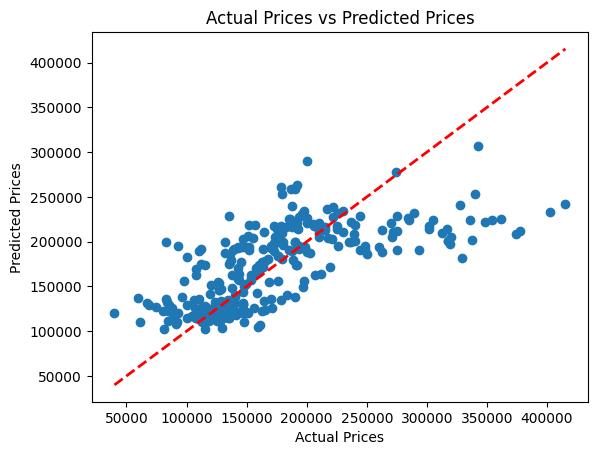

In [81]:
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.show()
